In [1]:
import cv2
from matplotlib.pyplot import imshow
import numpy as np

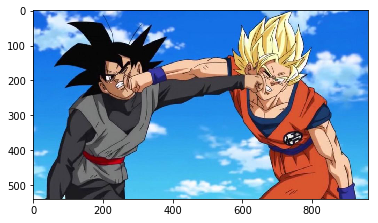

In [2]:
goku_image = cv2.imread("Data/Goku.jpg", cv2.IMREAD_COLOR)
imshow(cv2.cvtColor(goku_image, cv2.COLOR_BGR2RGB) )

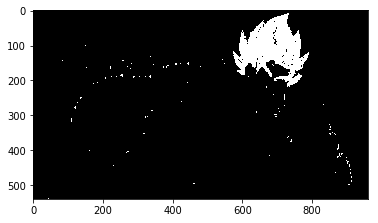

In [3]:
#Converting the BGR IMage to HSV for better colour
#selection
hsv_goku_image = cv2.cvtColor(goku_image,
                              cv2.COLOR_BGR2HSV)

#Stating The Range of HSV, pixel within which are needed
#to be selected and modified.
lower_colour = np.array([15, 10, 10], np.uint8)
upper_colour = np.array([35, 225, 255], np.uint8)

#Obtaining the mask array where these HSV are located.
hair_mask = cv2.inRange(hsv_goku_image, lower_colour,
                        upper_colour)
nev_hair_mask = cv2.bitwise_not(hair_mask)
imshow(hair_mask, cmap='gray' )

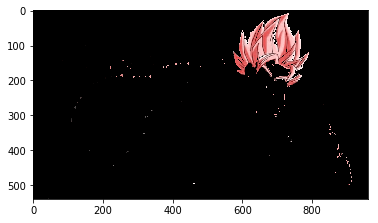

In [4]:
#Changing the colour of the portion of the which
#is needed to be modified
hsv_red_hair = cv2.bitwise_and(hsv_goku_image,
                                np.array([0,255,255]),
                                mask = hair_mask)

red_hair_goku = cv2.cvtColor(hsv_red_hair, 
                             cv2.COLOR_HSV2BGR)
imshow(cv2.cvtColor(red_hair_goku, cv2.COLOR_BGR2RGB) )

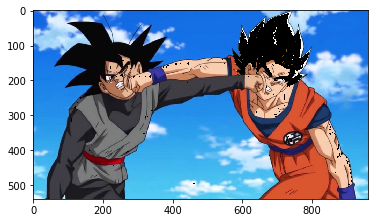

In [5]:
#Creating a cut-out of the portion which is needed,
#to be modified
hair_cutout_goku = cv2.bitwise_and(goku_image,
                                   goku_image,
                                   mask = nev_hair_mask)
imshow(cv2.cvtColor(hair_cutout_goku, cv2.COLOR_BGR2RGB) )

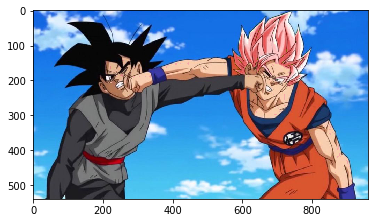

In [6]:
#Combining the cutout portion and the portion where colour
#change have been done.
new_hair_goku = cv2.add(red_hair_goku, hair_cutout_goku)
imshow(cv2.cvtColor(new_hair_goku, cv2.COLOR_BGR2RGB) )